In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os
from sklearn import metrics
import seaborn as sns
import numpy as np

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## Data Cleaning

In [8]:
round(df.isnull().sum()*100/len(df.index),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [9]:
df=df.drop(['Id','MiscFeature','GarageYrBlt','YearBuilt','MiscVal','PoolArea','OverallQual','YrSold'],axis=1)

In [10]:
#Imputing the values for the columns with nulls
df['MasVnrType']=df['MasVnrType'].replace(['NA','None'],'others')
#Imputing with the median value
df['LotFrontage']=df['LotFrontage'].replace(['NA'],'69')
df['LotFrontage']=df['LotFrontage'].replace(np.nan,'69')
df['GarageType']=df['GarageType'].replace(['NA'],'Others')
df['GarageFinish']=df['GarageFinish'].replace(['NA'],'Others')
df['GarageQual']=df['GarageQual'].replace(['NA'],'Others')
df['GarageCond']=df['GarageCond'].replace(['NA'],'Others')
df['PoolQC']=df['PoolQC'].replace(['NA'],'Others')
df['Fence']=df['Fence'].replace(['NA'],'Others')
df['Alley']=df['Alley'].replace(['NA'],'Others')
df['FireplaceQu']=df['FireplaceQu'].replace(['NA'],'Others')
df['BsmtFinType2']=df['BsmtFinType2'].replace(['NA'],'Others')
df['Electrical']=df['Electrical'].replace(['NA'],'SBrkr')
df['MasVnrArea']=df['MasVnrArea'].replace(np.nan,'0')

In [11]:
round(df.isnull().sum()*100/len(df.index),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallCond       0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
                 ...  
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType 

In [12]:
ds=df.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,1])
ds

,MSSubClass,LotArea,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,5.575342,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,6.321918,180921.195890
std,42.300571,9981.264932,1.112799,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,2.703626,79442.502883
min,20.000000,1300.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
10%,20.000000,5000.000000,5.000000,1950.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,...,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106475.000000
20%,20.000000,7078.400000,5.000000,1961.800000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,...,0.000000,1.000000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,124000.000000
30%,20.000000,8063.700000,5.000000,1971.000000,0.000000,0.000000,280.000000,840.000000,915.700000,0.000000,...,0.000000,1.000000,384.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,135500.000000
40%,30.000000,8793.400000,5.000000,1980.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,...,0.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,147000.000000
50%,50.000000,9478.500000,5.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
60%,60.000000,10198.200000,5.000000,1998.000000,525.600000,0.000000,604.400000,1088.000000,1182.000000,455.400000,...,1.000000,2.000000,516.000000,100.000000,40.000000,0.000000,0.000000,0.000000,7.000000,179280.000000


Index(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'SalePrice'],
      dtype='object')
28


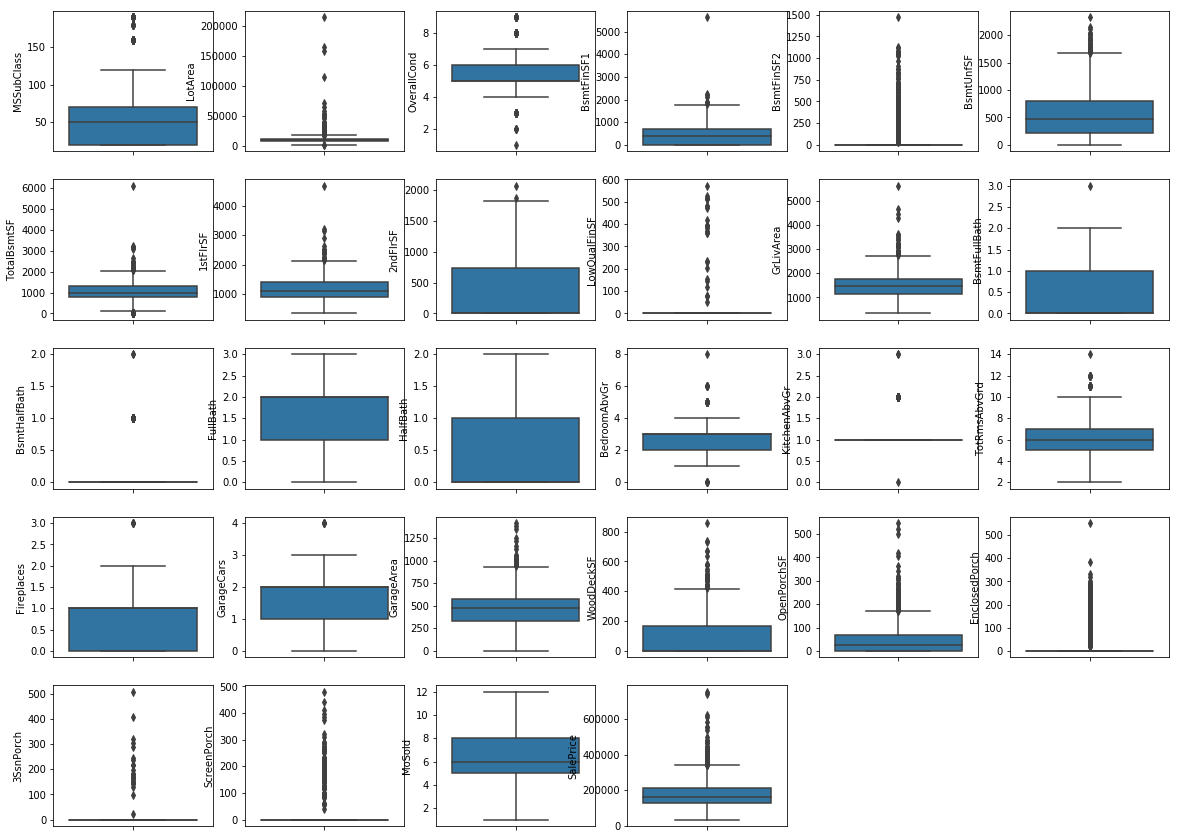

In [13]:
num=ds.columns
num=num.drop(['YearRemodAdd'])
print(num)
print(len(num))
plt.figure(figsize=(20,15))
for i in range(1,29):
    plt.subplot(5,6,i)
    sns.boxplot(y=df[num[i-1]])

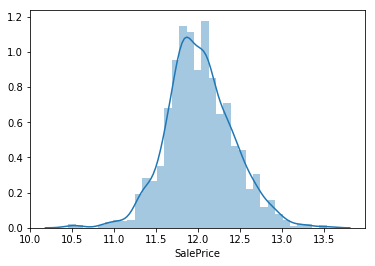

In [14]:
# simple density plot
df['SalePrice']=np.log(df['SalePrice'])
sns.distplot(df['SalePrice'])
plt.show()

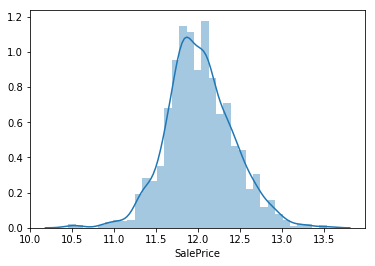

In [15]:
sns.distplot(df['SalePrice'])
plt.show()

In [16]:
df=df.loc[df['MSSubClass']<150]
df=df.loc[df['LotArea']<50000]
df=df.loc[df['BsmtFinSF1']<2000]
df=df.loc[df['WoodDeckSF']<500]
df=df.loc[df['TotalBsmtSF']<3000]
df.loc[df['3SsnPorch']>0,['3SsnPorch']]=1
df.loc[df['ScreenPorch']>0,['ScreenPorch']]=1
df.loc[df['BsmtFinSF2']>0,['BsmtFinSF2']]=1
df.loc[df['EnclosedPorch']>0,['EnclosedPorch']]=1
df.loc[df['LowQualFinSF']>0,['LowQualFinSF']]=1

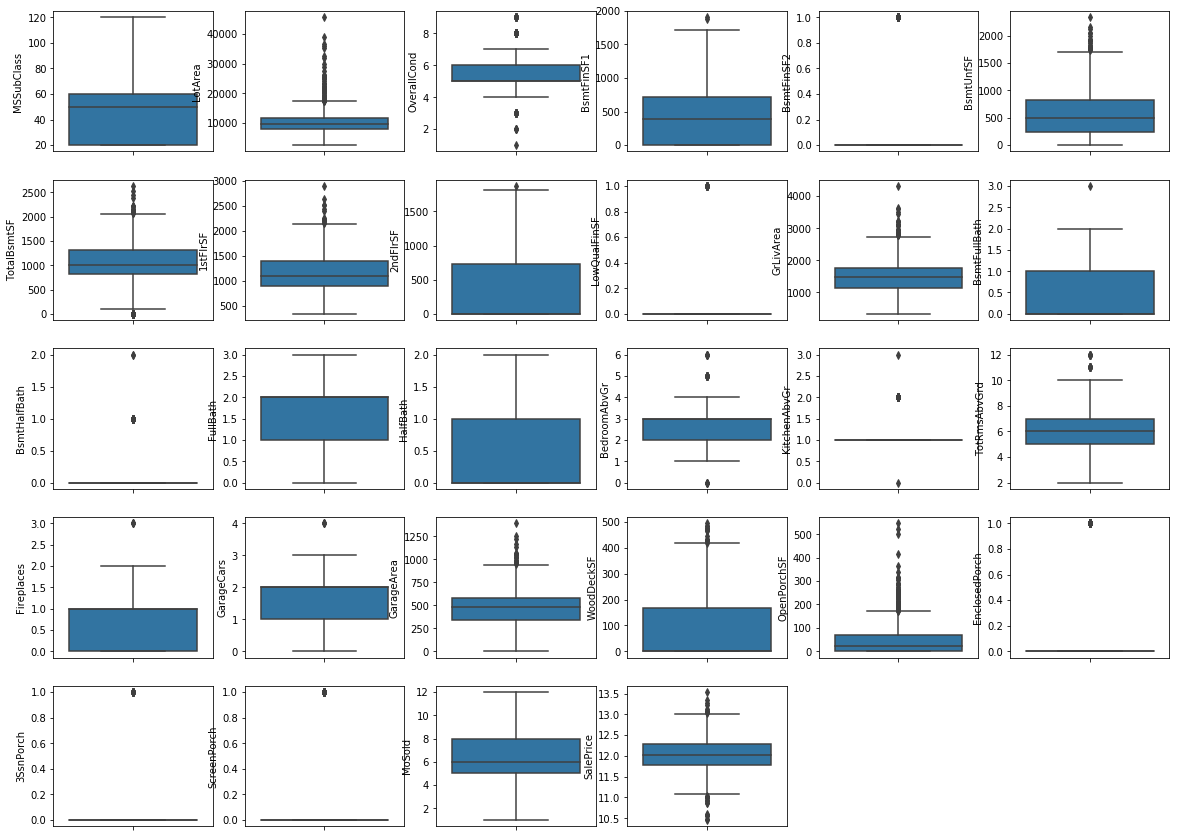

In [17]:
plt.figure(figsize=(20,15))
for i in range(1,29):
    plt.subplot(5,6,i)
    sns.boxplot(y=df[num[i-1]])

In [18]:
#Combining columns which have similar data
df['TotalFullBath']=df['BsmtFullBath']+df['FullBath']
df['TotalHalfBath']=df['BsmtHalfBath']+df['HalfBath']
# Post the above step, we drop those cols which now become redundant
df=df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

In [19]:
#Creating a new column to compute the age of the house
df['HouseAgeYrs']=2019-df['YearRemodAdd']
#Dropping the original column
df=df.drop(['YearRemodAdd'],axis=1)

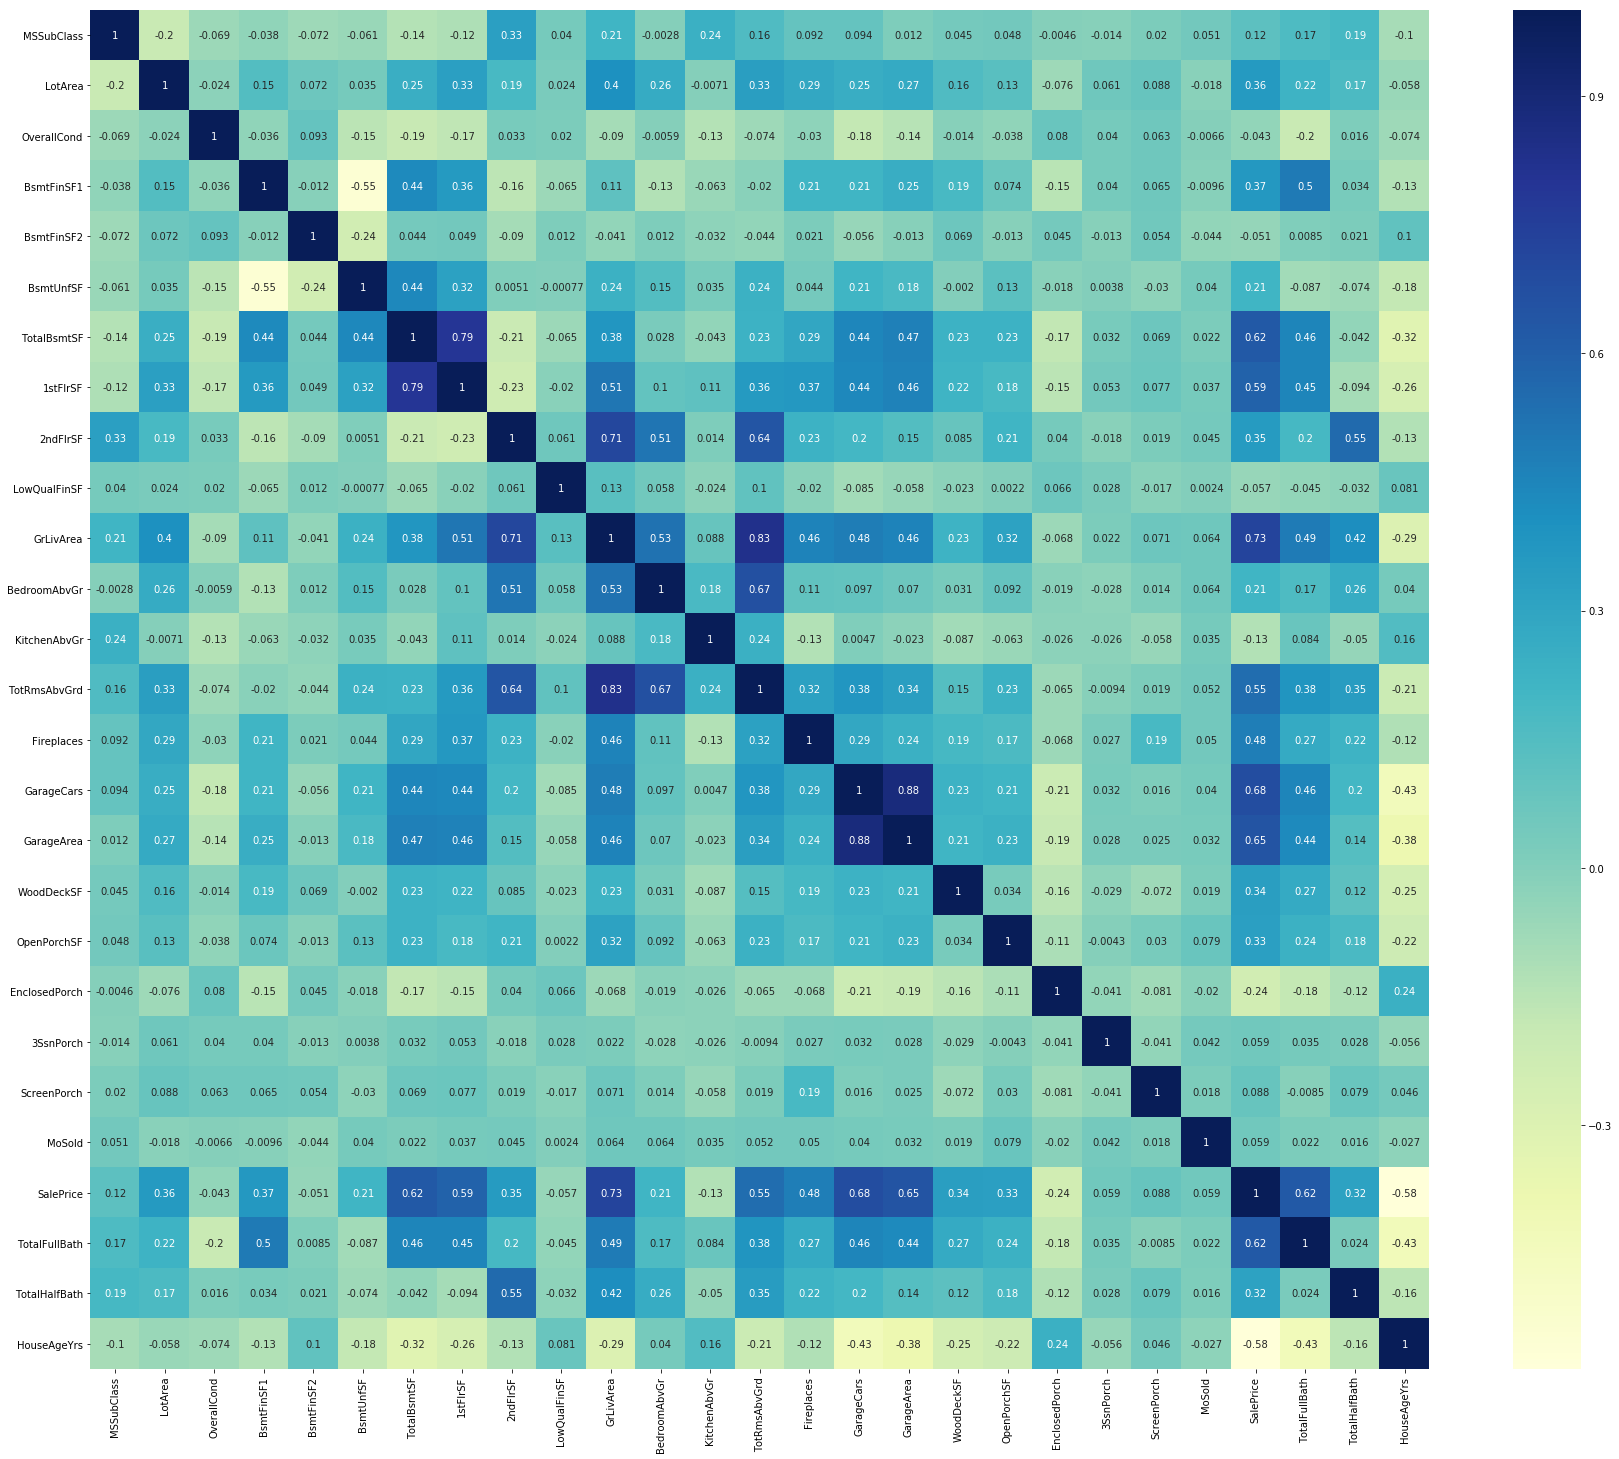

In [20]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dummy Variables

In [21]:
dummies = pd.get_dummies(df[['Alley','FireplaceQu','Fence','PoolQC','MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig',
                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                                'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                'SaleType','SaleCondition']])
df = pd.concat([df,dummies],axis=1)
df = df.drop(['Alley','FireplaceQu','Fence','PoolQC','MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig',
                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                                'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                'SaleType','SaleCondition'],axis=1)

In [22]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,5,196,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,8,0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,5,162,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,5,0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,5,350,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


## RFE and Scaling

In [23]:
#test-train split and min-max scaling
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF','GrLivArea',
           'TotalFullBath', 'TotalHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
           'MoSold', 'SalePrice']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
654,0.0,0.215548,0.233441,0.625,0.412500,0.902128,0.0,0.191825,0.835578,0.693838,...,0,0,0,1,0,0,0,0,1,0
1379,0.6,0.151943,0.212794,0.500,0.000000,0.000000,0.0,0.178356,0.152139,0.163807,...,0,0,0,1,0,0,0,0,1,0
1395,0.4,0.204947,0.298971,0.500,0.153125,0.000000,0.0,0.508128,0.433439,0.311622,...,0,0,0,1,0,0,0,0,1,0
206,0.0,0.035336,0.328618,0.500,0.000000,0.000000,0.0,0.529494,0.451664,0.531201,...,0,0,0,1,0,0,0,0,1,0
1374,0.4,0.194346,0.238971,0.500,0.000000,0.000000,0.0,0.476544,0.406498,0.269891,...,0,0,0,1,0,0,0,0,1,0


In [26]:
Y_train = df_train.pop('SalePrice')
X_train = df_train

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE 
lm = LinearRegression()
lm.fit(X_train,Y_train)
rfe = RFE(lm,80)             # running RFE
rfe = rfe.fit(X_train,Y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 130),
 ('LotFrontage', False, 115),
 ('LotArea', False, 119),
 ('OverallCond', False, 112),
 ('MasVnrArea', False, 152),
 ('BsmtFinSF1', False, 118),
 ('BsmtFinSF2', False, 94),
 ('BsmtUnfSF', False, 160),
 ('TotalBsmtSF', False, 111),
 ('1stFlrSF', False, 132),
 ('2ndFlrSF', False, 131),
 ('LowQualFinSF', False, 135),
 ('GrLivArea', False, 110),
 ('BedroomAbvGr', False, 171),
 ('KitchenAbvGr', False, 113),
 ('TotRmsAbvGrd', False, 129),
 ('Fireplaces', False, 128),
 ('GarageCars', False, 173),
 ('GarageArea', False, 117),
 ('WoodDeckSF', False, 151),
 ('OpenPorchSF', False, 125),
 ('EnclosedPorch', False, 161),
 ('3SsnPorch', False, 150),
 ('ScreenPorch', False, 148),
 ('MoSold', False, 149),
 ('TotalFullBath', False, 162),
 ('TotalHalfBath', False, 168),
 ('HouseAgeYrs', False, 181),
 ('Alley_Grvl', False, 180),
 ('Alley_Pave', False, 127),
 ('FireplaceQu_Ex', False, 166),
 ('FireplaceQu_Fa', False, 170),
 ('FireplaceQu_Gd', False, 156),
 ('FireplaceQu_Po', Fal

In [29]:
cols = X_train.columns[rfe.support_]
cols

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'Neighborhood_Blmngtn', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'HouseSty

In [30]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=192)

## Model Creation

In [31]:
# Create the X_test dataframe 
X_train_rfe = X_train[cols]

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
# Run the linear model
lm = sm.OLS(Y_train,X_train_rfe).fit()  

In [34]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     48.76
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          1.40e-248
Time:                        19:01:00   Log-Likelihood:                 1312.6
No. Observations:                 929   AIC:                            -2487.
Df Residuals:                     860   BIC:                            -2154.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0816 

In [35]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
40,Neighborhood_Timber,inf
41,Neighborhood_Veenker,inf
59,BsmtQual_TA,inf
58,BsmtQual_Gd,inf
57,BsmtQual_Fa,inf
56,BsmtQual_Ex,inf
55,Foundation_Wood,inf
54,Foundation_Stone,inf
53,Foundation_Slab,inf
52,Foundation_PConc,inf


## Ridge Regression

In [36]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010971,0.018955,0.001197,0.000746,0.0001,{'alpha': 0.0001},-0.052407,-0.049438,-0.050706,-0.046327,...,-0.049705,0.001991,23,-0.043167,-0.044242,-0.044215,-0.045327,-0.043976,-0.044185,0.000691
1,0.004388,0.005300,0.001795,0.002129,0.001,{'alpha': 0.001},-0.052406,-0.049438,-0.050704,-0.046326,...,-0.049704,0.001990,22,-0.043166,-0.044242,-0.044215,-0.045326,-0.043976,-0.044185,0.000691
2,0.001396,0.000488,0.000599,0.000489,0.01,{'alpha': 0.01},-0.052393,-0.049434,-0.050685,-0.046317,...,-0.049694,0.001988,21,-0.043165,-0.044240,-0.044216,-0.045326,-0.043976,-0.044185,0.000691
3,0.002194,0.000399,0.000000,0.000000,0.05,{'alpha': 0.05},-0.052337,-0.049419,-0.050604,-0.046276,...,-0.049652,0.001979,20,-0.043159,-0.044232,-0.044222,-0.045324,-0.043978,-0.044183,0.000692
4,0.001396,0.000489,0.000599,0.000489,0.1,{'alpha': 0.1},-0.052277,-0.049401,-0.050508,-0.046226,...,-0.049602,0.001971,19,-0.043153,-0.044225,-0.044228,-0.045322,-0.043980,-0.044182,0.000693


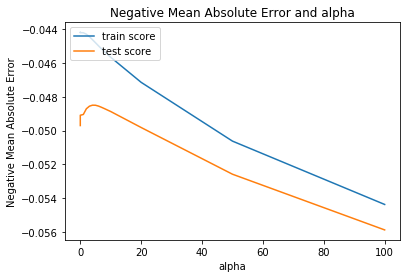

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [39]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, Y_train)
ridge.coef_

array([ 0.        , -0.08582458,  0.02188882, -0.00733922,  0.04312264,
        0.02815234,  0.00234714, -0.00234714, -0.00351414,  0.00382504,
        0.00659081, -0.00690171, -0.00416156,  0.01249273, -0.0135435 ,
        0.00521233,  0.0282805 , -0.0282805 ,  0.01364261,  0.02616175,
       -0.01619545, -0.03491566,  0.0318303 , -0.01234289,  0.04081591,
       -0.04577935, -0.03051748, -0.06175771, -0.01672764, -0.01491651,
       -0.01715099,  0.01450431,  0.07358812,  0.04621355, -0.04278897,
       -0.01951107, -0.03222601,  0.00242332,  0.03358956,  0.05894386,
        0.0128947 ,  0.03002609,  0.01455351, -0.02810393, -0.02351945,
        0.00948491,  0.06234581,  0.02480838, -0.03982471, -0.01974451,
       -0.01006751,  0.00592739,  0.01137951, -0.03595669,  0.0285663 ,
        0.00015101,  0.084056  , -0.02193189,  0.01785032, -0.00650417,
        0.00126965,  0.04491055, -0.01026237,  0.03755244,  0.01353172,
        0.00738415,  0.03058572,  0.01011962,  0.01088294,  0.00

In [40]:
Features_v1=pd.DataFrame(X_train_rfe.columns,columns=['Variables'])
Features_v1['Feature_Coeff']=ridge.coef_
top_Features=Features_v1[Features_v1['Feature_Coeff']>0]
Top=top_Features.sort_values(by='Feature_Coeff',ascending=False).head(9)
Top

,Variables,Feature_Coeff
56,BsmtQual_Ex,0.084056
70,KitchenQual_Ex,0.073868
32,Neighborhood_NoRidge,0.073588
46,HouseStyle_2.5Unf,0.062346
80,GarageCond_TA,0.059367
39,Neighborhood_StoneBr,0.058944
33,Neighborhood_NridgHt,0.046214
74,GarageFinish_Fin,0.045691
61,BsmtCond_Gd,0.044911


## Lasso

In [41]:
params = {'alpha': [0.0001,0.0002, 0.0003, 0.0004, 0.0005,0.01]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007181,0.000977,0.000399,4.885192e-04,0.0001,{'alpha': 0.0001},-0.052137,-0.049144,-0.050323,-0.045655,...,-0.049277,0.002119,4,-0.043357,-0.044332,-0.044413,-0.045467,-0.044280,-0.044370,0.000669
1,0.003790,0.001163,0.000598,4.884998e-04,0.0002,{'alpha': 0.0002},-0.051913,-0.049176,-0.049581,-0.045144,...,-0.048996,0.002181,1,-0.043904,-0.044776,-0.044709,-0.045658,-0.044628,-0.044735,0.000558
2,0.003391,0.000488,0.000199,3.989220e-04,0.0003,{'alpha': 0.0003},-0.051838,-0.049737,-0.049594,-0.045059,...,-0.049017,0.002215,2,-0.044401,-0.045234,-0.045275,-0.045954,-0.045003,-0.045174,0.000500
3,0.002593,0.000798,0.000997,1.507891e-07,0.0004,{'alpha': 0.0004},-0.051816,-0.049780,-0.049817,-0.045289,...,-0.049088,0.002146,3,-0.044950,-0.045654,-0.045602,-0.046393,-0.045446,-0.045609,0.000464
4,0.002394,0.000798,0.000798,3.989220e-04,0.0005,{'alpha': 0.0005},-0.051892,-0.049883,-0.050084,-0.045719,...,-0.049300,0.002033,5,-0.045471,-0.046152,-0.045982,-0.046847,-0.046028,-0.046096,0.000442


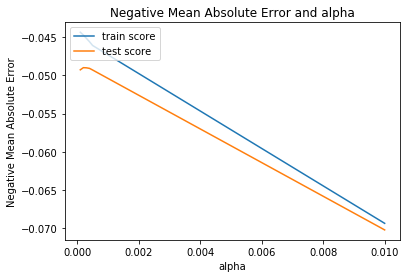

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [44]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.01325664, -0.        ,  0.        ,
       -0.        , -0.        ,  0.03042316, -0.        ,  0.        ,
        0.        ,  0.00833299, -0.        ,  0.        , -0.01527921,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.02630725, -0.        , -0.        , -0.  

In [46]:
Features=pd.DataFrame(X_train_rfe.columns,columns=['Variables'])
Features['Feature_Coeff']=lasso.coef_
top_Features=Features[Features['Feature_Coeff']>0]
top_Features

,Variables,Feature_Coeff
47,HouseStyle_2Story,0.013257
52,Foundation_PConc,0.030423
56,BsmtQual_Ex,0.008333
66,BsmtFinType1_GLQ,0.026307
74,GarageFinish_Fin,0.017790
80,GarageCond_TA,0.015261


In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df=df[['GrLivArea','TotalBsmtSF','OverallCond','LotArea','GarageCars','MSZoning_FV','OpenPorchSF','GarageArea','CentralAir_Y','SalePrice']]
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


num_vars = ['GrLivArea','TotalBsmtSF','OverallCond','LotArea','GarageCars','MSZoning_FV','OpenPorchSF','GarageArea','CentralAir_Y','SalePrice']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,GrLivArea,TotalBsmtSF,OverallCond,LotArea,GarageCars,MSZoning_FV,OpenPorchSF,GarageArea,CentralAir_Y,SalePrice
654,0.446760,0.835578,0.625,0.233441,0.75,0.0,0.084095,0.672276,1.0,0.748970
1379,0.266198,0.152139,0.500,0.212794,0.50,0.0,0.000000,0.320513,1.0,0.508335
1395,0.539427,0.433439,0.500,0.298971,0.75,0.0,0.071298,0.514423,1.0,0.677519
206,0.342039,0.451664,0.500,0.328618,0.25,0.0,0.054845,0.279647,1.0,0.458747
1374,0.407835,0.406498,0.500,0.238971,0.75,1.0,0.383912,0.750000,1.0,0.639103


In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [49]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [50]:
lm = sm.OLS(Y_train,X_train).fit()  

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     416.7
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          3.48e-317
Time:                        19:09:26   Log-Likelihood:                 1333.7
No. Observations:                 929   AIC:                            -2647.
Df Residuals:                     919   BIC:                            -2599.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0506      0.012      4.291   

In [52]:
y_train_price = lm.predict(X_train)

Text(0.5, 0, 'Errors')

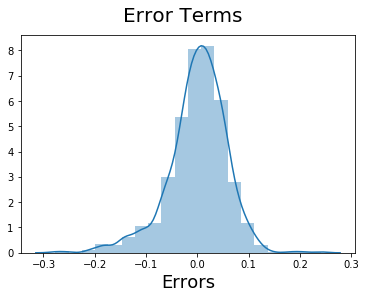

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [54]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [55]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [56]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['GrLivArea','TotalBsmtSF','OverallCond','LotArea','GarageCars','MSZoning_FV','OpenPorchSF','GarageArea','CentralAir_Y']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [57]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

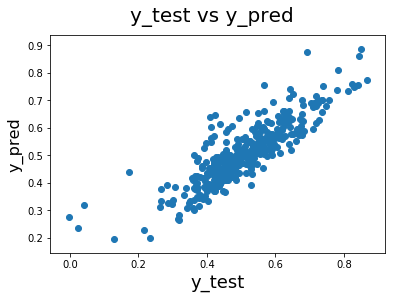

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7491149389532261